## Lab 3 - Mental Rotation

In this experiment, 54 subjects performed a mental rotation task similar to Shepard & Metzler (1971): multiple pairs of 3D objects were presented at four different rotating angles. Data was obtained from Ganis & Kievit (2015).

The goal is to analyze the relationship between subjects' reaction times (dependent variable) and angles (independent variable) both within subjects **[Tasks 1-3]** and across subjects **[Tasks 4-5]**.

Begin your solution as prompted below; everything else was written.

Refer to the lecture slides for the set of functions that you might use for this lab.


This lab must be done **individually**. The required packages have been imported for you below.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import linregress

Total number of subjects in the experiment that you will analyze.

In [4]:
nsubject = 54

The four angles (in degrees) at which 3D objects were presented.

In [5]:
unique_angles = [0,50,100,150] 

Create place-holder variable for recording mean response times (see below).

In [11]:
rt_matrix = np.zeros((nsubject,4))
std_matrix = np.zeros((nsubject,4)) # place holder for std

Create place-holder variable for recording slopes (see below).

In [22]:
slopes = np.zeros(nsubject)

Create a meta figure that visualizes results for individual subjects, then begin analysis.

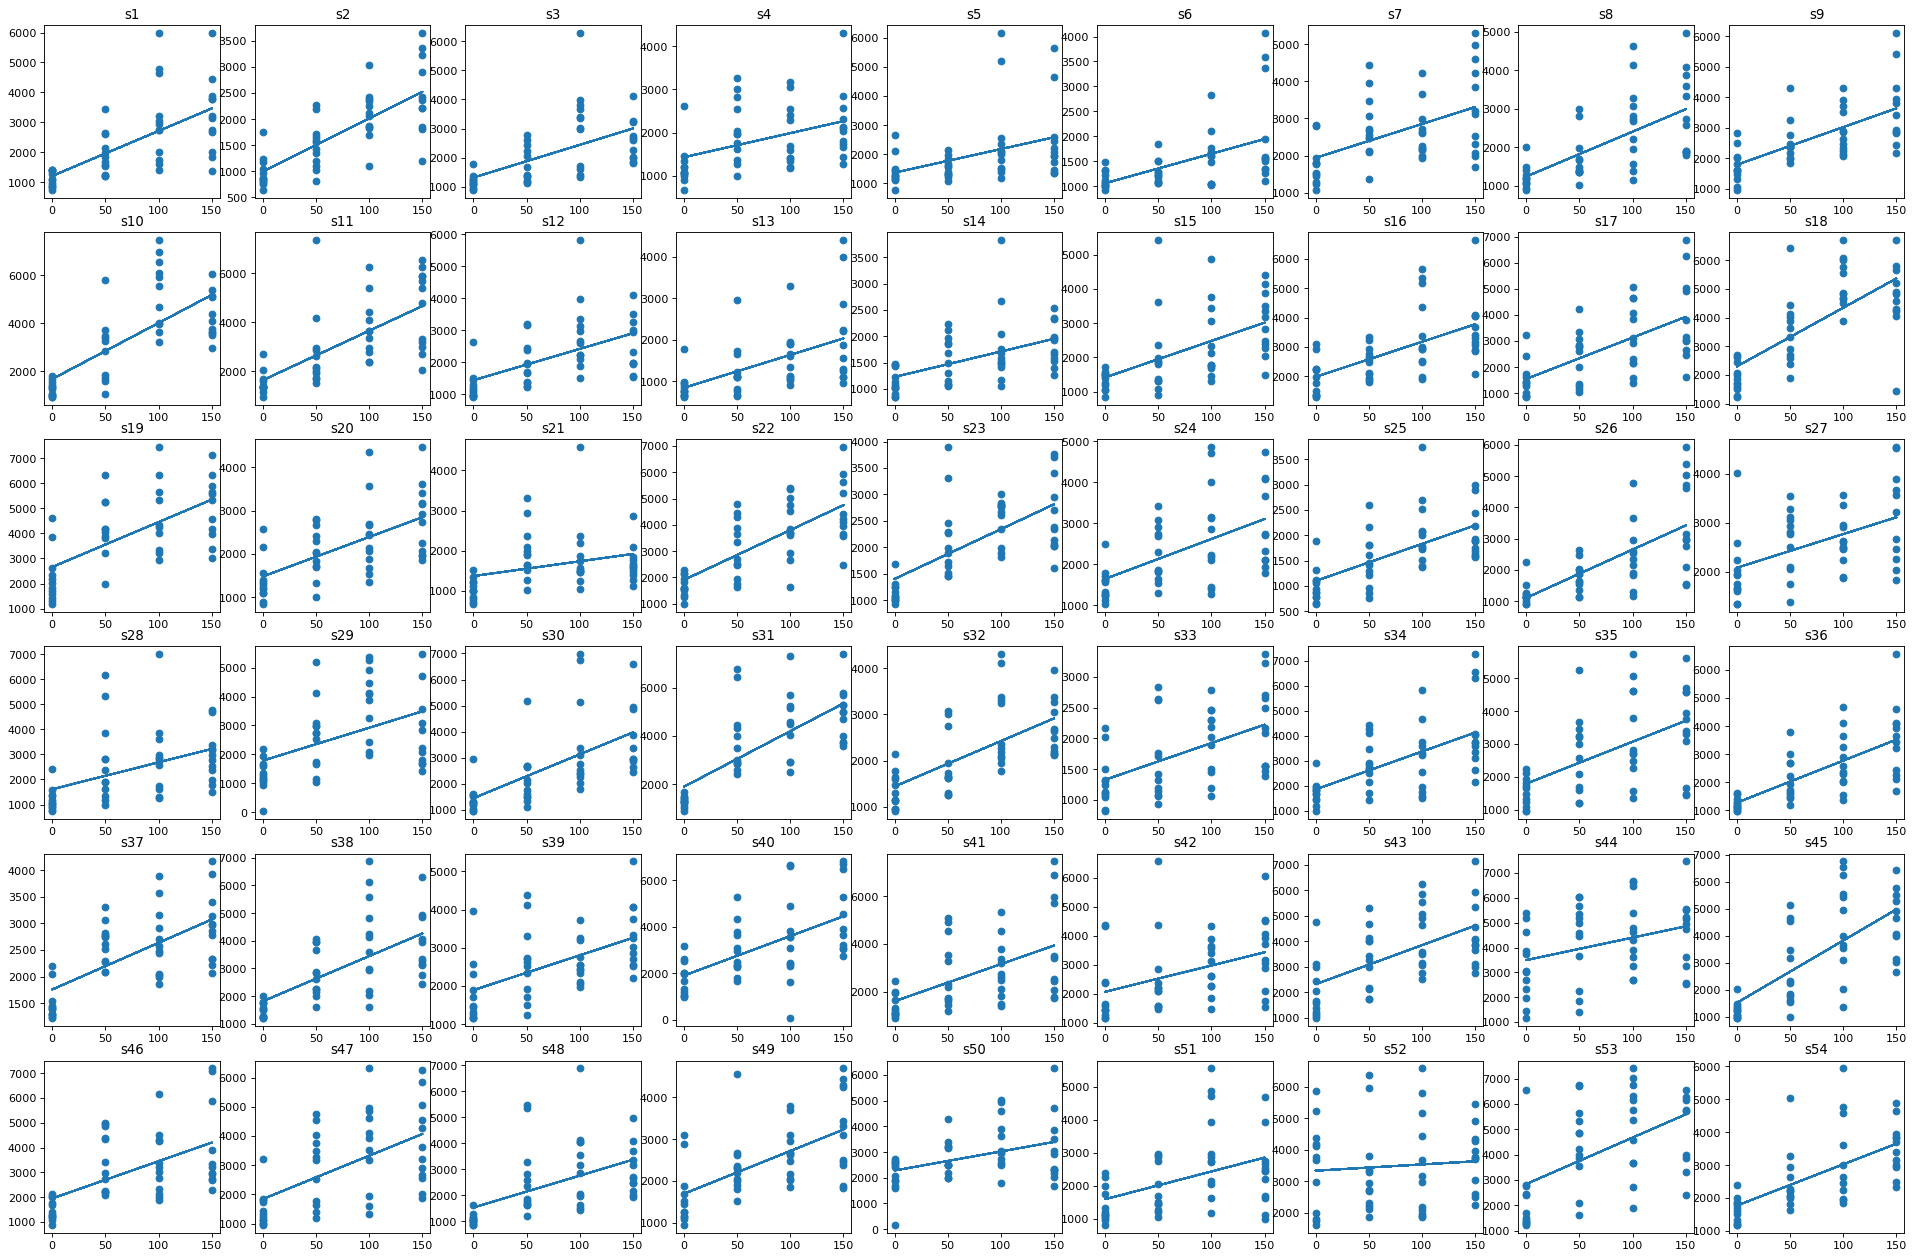

In [26]:
fig = plt.figure(figsize=(30, 20), dpi= 80, facecolor='w', edgecolor='k')

# Loop over the subjects
for s in range(0,nsubject):
    
    # Specify the file name of the subject in question
    fn_in = 'data-mental-rotation/sub'+str(s+1)

    # Read in experimental data
    with open(fn_in+'.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
        stimuli, rt, angle, acc, ind_stimuli = pickle.load(f)
        
    # Focus on trials where stimulus pair is matched
    inds= np.where(ind_stimuli==0)
    
    # Record the reaction time (rt) for each trial in a vector
    rt = np.float32(rt[inds])
    # Record the angle of the object pair for each trial in a vector
    angle = np.float32(angle[inds])
    
    
    #========== Your solution begins here ==========
    
    # Task 1: Line fitting [3pts]
    
    #-------Task 1.1-------
    # Fit a line (linear regression) between reaction time (rt) and angle
    # i.e. rt = angle x slope + intercept
    
    linefit = np.polyfit(angle[np.isfinite(rt)], rt[np.isfinite(rt)], 1)
    
    #-------Task 1.2-------
    # Record the slope for this subject in place-holder variable "slopes"
    
    slope = linefit[0]
    slopes[s] = slope
    
    # Create a subplot for this subject
    plt.subplot(6,9,s+1)
    
    # Task 2: Within-subject visualization [2pts]
    
    #-------Task 2.1-------
    # Scatter plot reaction times (y-axis) against angles (x-axis)
    
    plt.scatter(angle[np.isfinite(rt)], rt[np.isfinite(rt)])
    
    #-------Task 2.2-------
    # Juxtapose the fitted line onto this scatter plot
    intercept = linefit[1]
    plt.plot(angle[np.isfinite(rt)], intercept + slope * angle[np.isfinite(rt)], '-')
    
    # Specify title of the plot by subject index
    plt.title('s'+str(s+1))
        
    # Task 3: Within-subject statistics [1pt]
        
    #-------Task 3.1-------
    # Calculate within-subject mean response time across trials, for each angle
    anglecleaned = angle[np.isfinite(rt)]
    rtcleaned = rt[np.isfinite(rt)]
    angle_list = []
    
    for angle in unique_angles:
        angle_list.append(np.nanmean(rtcleaned[anglecleaned == angle]))
        

    
    #-------Task 3.2-------
    # Record this value in place-holder variable "rt_matrix"
    
    rt_matrix[s,] = angle_list
    
    # Calculate response time standard deviation and store in std_matrix
    angle_std_list = []
    std = 0
    for angle in unique_angles:
        current_std = np.nanstd(rtcleaned[anglecleaned == angle])
        angle_std_list.append(np.nanstd(rtcleaned[anglecleaned == angle]))
        std += current_std
    
    avg_std = std/4 # because there are 4 unique angles
    std_matrix[s,] = angle_std_list
    


    
plt.show()


### Task 4: Across-subject visualization [2pts]

**Task 4.1**: Take the average of mean response times across subjects, for each angle.

In [42]:
# Write your code here.

avg_mean_angle_0 = np.mean(rt_matrix[:, [0]])
avg_mean_angle_50 = np.mean(rt_matrix[:, [1]])
avg_mean_angle_100 = np.mean(rt_matrix[:, [2]])
avg_mean_angle_150 = np.mean(rt_matrix[:, [3]])

avg_mean_angle_list = [avg_mean_angle_0, avg_mean_angle_50, avg_mean_angle_100, avg_mean_angle_150]
for i in range(4):
    print("average of mean response time of " + str(unique_angles[i]) + " degree: " + str(avg_mean_angle_list[i]))

average of mean response time of 0 degree: 1537.9027755172165
average of mean response time of 50 degree: 2508.8503033673323
average of mean response time of 100 degree: 3120.911496762876
average of mean response time of 150 degree: 3353.570246943721


**Task 4.2**: Take the standard deviation of mean response times across subjects, for each angle.

In [44]:
avg_std_angle_0 = np.mean(std_matrix[:, [0]])
avg_std_angle_50 = np.mean(std_matrix[:, [1]])
avg_std_angle_100 = np.mean(std_matrix[:, [2]])
avg_std_angle_150 = np.mean(std_matrix[:, [3]])

std_mean_angle_list = [avg_std_angle_0, avg_std_angle_50, avg_std_angle_100, avg_std_angle_150]
for i in range(4):
    print("average of mean response time of " + str(unique_angles[i]) + " degree: " + str(std_mean_angle_list[i]))

average of mean response time of 0 degree: 500.74333247432
average of mean response time of 50 degree: 897.2320579246239
average of mean response time of 100 degree: 1091.7502317075375
average of mean response time of 150 degree: 1077.2051397252965


**Task 4.3**: Plot the average and standard deviation values calculated above, against the four angles.

**Task 4.4**: Label both axes.

Text(0.5, 0, 'Angle in degree')

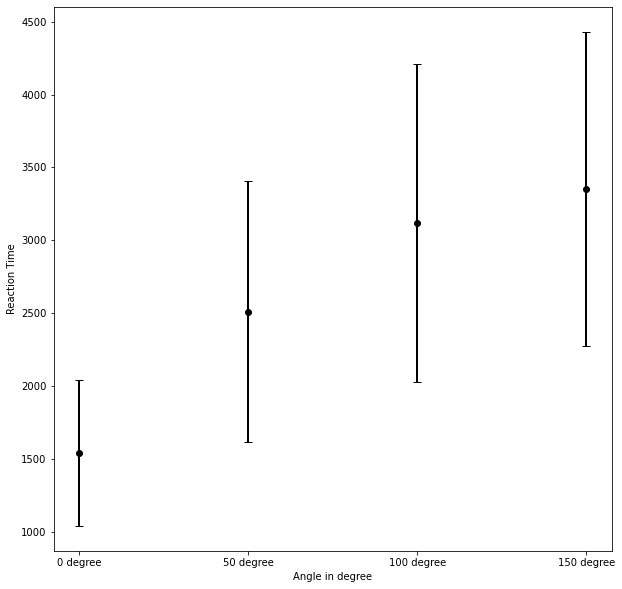

In [52]:
# plt.figure()

plt.rcParams['figure.figsize']=(10,10)
plt.errorbar(x =[0,50,100,150] ,y = angle_mean ,yerr= std_mean_angle_list, fmt='o', ecolor='black', color='black', elinewidth=2, capsize=4) # set xticks
ang_list = []
# making x axis looks nice
for i in range(4):
    ang_list.append(str(str(unique_angles[i]) + " degree"))

plt.xticks(unique_angles, ang_list) 
plt.ylabel("Reaction Time")
plt.xlabel("Angle in degree")

# plt.show()

### Task 5: Across-subject statistics [2pts]

**Task 5.1**: Plot a histogram of slopes (across subjects) from the line fits in **Tasks 1.1** and **1.2**.

**Task 5.2**: Label both axes.

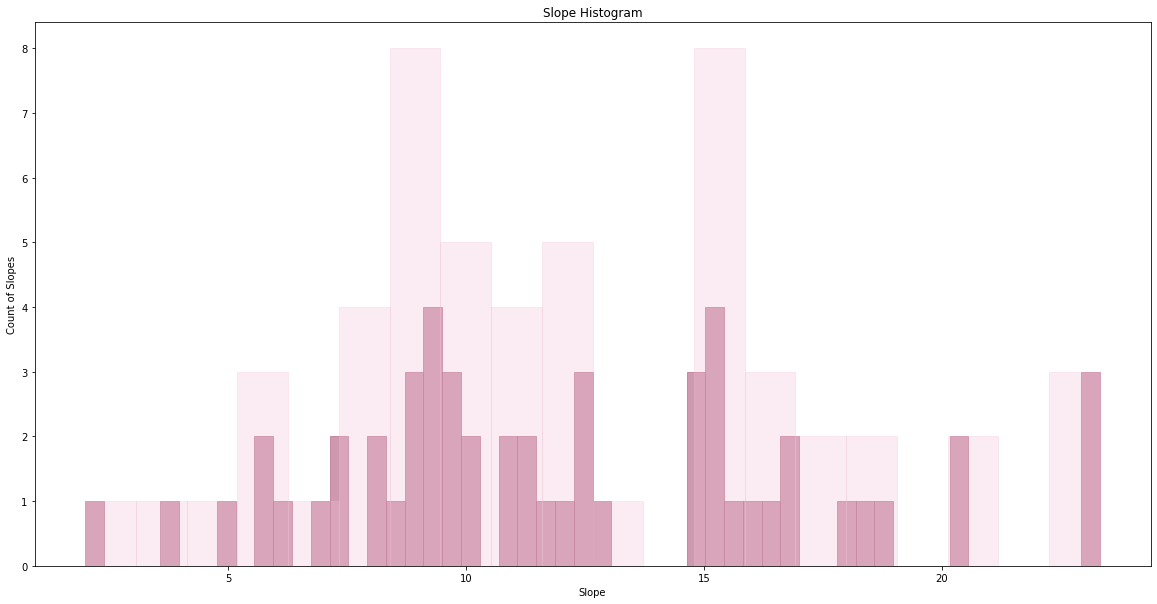

In [74]:
# Write your code here.
plt.rcParams['figure.figsize']=(20,10)
plt.hist(slopes, facecolor='#ba6e8d', edgecolor='#ba6e8d', bins= 54, alpha=0.7)
# len(np.unique(slopes)) = 54, so all the unique slope value is being plotted
plt.hist(slopes, facecolor='#f0c2d5', edgecolor='#f0c2d5', bins= 20,alpha=0.3)
# a rounded version, for overall visualization of slope variation
plt.title("Slope Histogram") 
plt.xlabel("Slope") 
plt.ylabel("Count of Slopes")
plt.show()

Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. Please follow the usual naming convention for **both** your Jupyter Notebook and PDF files: `lab3_writeup_YourStudentNumber.pdf`